## Install libraires

In [ ]:
!pip install markupsafe==2.0.1
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-2.11.3-py2.py

In [ ]:
!pip uninstall Jinja2 --yes
!pip install Jinja2

Found existing installation: Jinja2 2.11.3
Uninstalling Jinja2-2.11.3:
  Successfully uninstalled Jinja2-2.11.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.15.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have foliu

## Importing the libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from IPython.core.pylabtools import figsize
from pycaret.utils import enable_colab
enable_colab()
from pycaret.anomaly import *
from sklearn.cluster import DBSCAN
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

Colab mode enabled.


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Importng the *dataset*

In [ ]:
anomaly_detection = pd.read_csv('Dataset_to_be_used_in_anomaly_detection.csv')
anomaly_detection.head()

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader
0,9,-1.042570,-0.241098,-1.267957,0.414568
1,10,-1.056986,-0.245590,-1.165454,0.411869
2,11,-1.071858,-0.256787,-1.028780,0.407472
3,12,-1.084518,-0.257502,-0.850609,0.367564
4,13,-0.974811,-0.105985,-0.625045,0.236174


In [ ]:
anomaly_detection.columns

Index(['Unnamed: 0', 'Follower_measure_x_follower',
       'Follower_measure_y_follower', 'Leader_measure_x_leader',
       'Leader_measure_y_leader'],
      dtype='object')

In [ ]:
anomaly_detection.drop('Unnamed: 0' ,axis =1, inplace=True)
anomaly_detection.head()

,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader
0,-1.042570,-0.241098,-1.267957,0.414568
1,-1.056986,-0.245590,-1.165454,0.411869
2,-1.071858,-0.256787,-1.028780,0.407472
3,-1.084518,-0.257502,-0.850609,0.367564
4,-0.974811,-0.105985,-0.625045,0.236174


## Modeling

In [ ]:
s = setup(anomaly_detection, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(98, 4)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(98, 4)"
9,CPU Jobs,-1


In [ ]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
def models(model):
  ml_model = create_model(model,fraction=0.05)
  ml_model_results = assign_model(ml_model)
  anomalies = ml_model_results[ml_model_results['Anomaly'] == 1]
  results = ml_model_results.iloc[:,:-2]
  c = 1
  figsize(10,7)
  for column in results.columns:
    plt.subplot(2,2,c)
    plt.plot(ml_model_results[column])
    plt.scatter(anomalies.index,anomalies[column],c = 'r', marker ='o', s = 50)
    plt.title(" ".join(column.split('_')))
    c = c+1
  
  return anomalies, ml_model_results

1. SVM

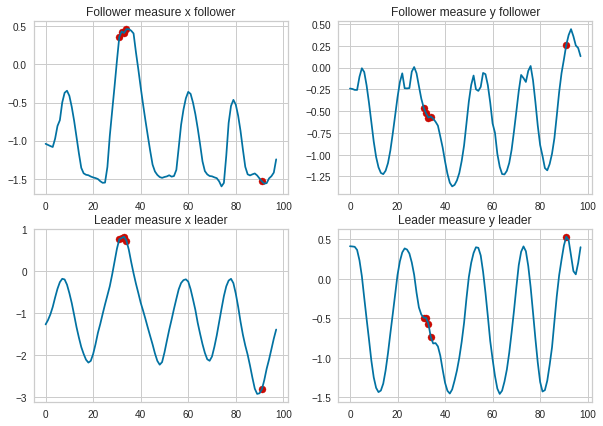

In [ ]:
anomalies_svm, svm_model_results = models('svm')

2. KNN

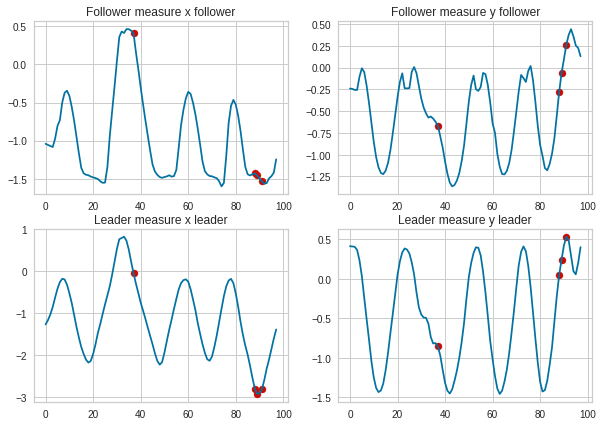

In [ ]:
anomalies_KNN, knn_model_results = models('knn')

3. PCA

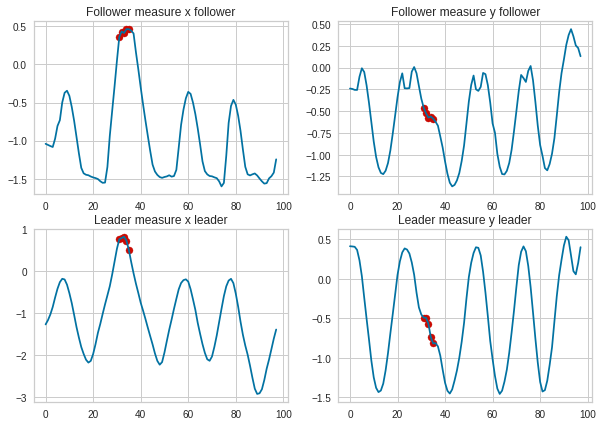

In [ ]:
anomalies_PCA, pca_model_results = models('pca')

4. DBSCAN

In [ ]:
model = DBSCAN(eps=0.5, min_samples=7)
predLabels = model.fit_predict(anomaly_detection)
predLabels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0])

In [ ]:
# replace -1 to 1 
Dbscan=np.where(predLabels==-1,1,predLabels)
Dbscan

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

##TSNE plot

In [ ]:
def tsne(x,y):
    Tsne = TSNE(n_components = 2)
    tsne_results = Tsne.fit_transform(x)
    df = pd.DataFrame()
    df['feature 1'] = tsne_results[:,0]
    df['feature 2'] = tsne_results[:,1]
    df['y'] = y
    sns.scatterplot(x = 'feature 1', y = 'feature 2', hue = df.y.tolist(), data = df)

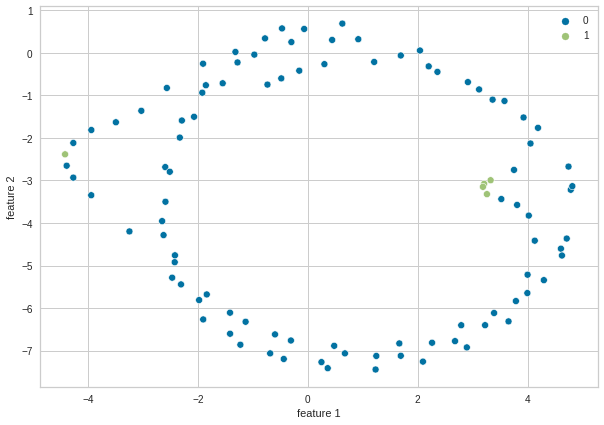

In [ ]:
tsne(svm_model_results.iloc[:,:-2],svm_model_results.iloc[:,-2])

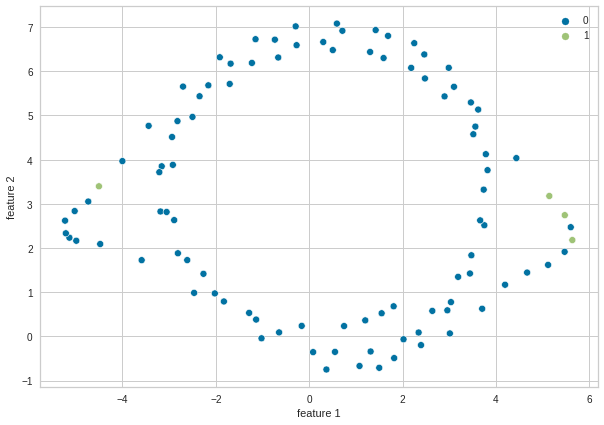

In [ ]:
tsne(knn_model_results.iloc[:,:-2], knn_model_results.iloc[:,-2])

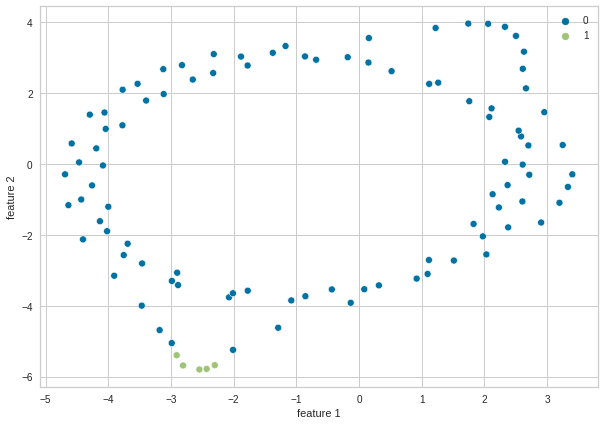

In [ ]:
tsne(pca_model_results.iloc[:,:-2],pca_model_results.iloc[:,-2])

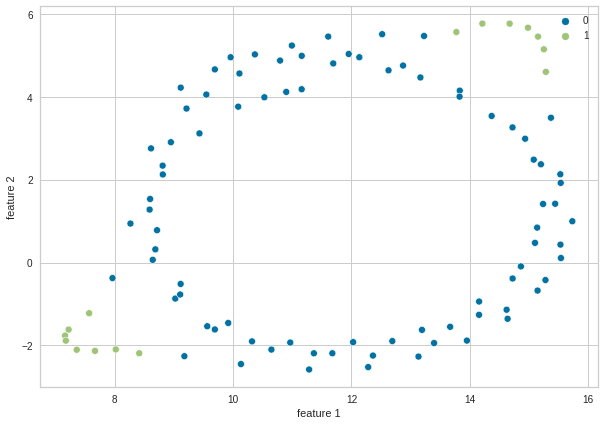

In [ ]:
tsne(pca_model_results.iloc[:,:-2],Dbscan)

## Evaluation 

In [ ]:
preformance = pd.read_csv('/content/Dataset_to_be_used_in_performance_comparison.csv')
preformance.head()

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,labels
0,9,-1.042570,-0.241098,-1.267957,0.414568,0.0
1,10,-1.056986,-0.245590,-1.165454,0.411869,0.0
2,11,-1.071858,-0.256787,-1.028780,0.407472,0.0
3,12,-1.084518,-0.257502,-0.850609,0.367564,0.0
4,13,-0.974811,-0.105985,-0.625045,0.236174,0.0


In [ ]:
true_label = preformance.iloc[:,-1]
svm_label = svm_model_results.iloc[:,-2]
knn_label = knn_model_results.iloc[:,-2]
pca_label = pca_model_results.iloc[:,-2]

In [ ]:
cr_svm = classification_report(true_label,svm_label)
print(cr_svm)

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        86
         1.0       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98



In [ ]:
cr_knn = classification_report(true_label,knn_label)
print(cr_knn)

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94        86
         1.0       0.75      0.25      0.38        12

    accuracy                           0.90        98
   macro avg       0.83      0.62      0.66        98
weighted avg       0.89      0.90      0.87        98



In [ ]:
cr_pca = classification_report(true_label,pca_label)
print(cr_pca)

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        86
         1.0       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98



In [ ]:
cr_DB= classification_report(true_label,Dbscan)
print(cr_DB)

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97        86
         1.0       0.73      0.92      0.81        12

    accuracy                           0.95        98
   macro avg       0.86      0.94      0.89        98
weighted avg       0.96      0.95      0.95        98

